The Black Friday Data Set is from a retail store in the United States and contains records of transactions from its entire black friday sales from last year. 

Data is from kaggle.com

While this store has had relatively good success in the past year, its management/staff would like to understand its consumer's behavior and product reach to further improve it's targeted advertising. 

I've used this data set to identify the type of customers that frequently shop at their store by looking at key demographic variables - Gender, Age, Resident Years, City and by identifying the most sold products within their product categories. 

# Importing Data 

In [1]:
import pandas as pd
%matplotlib inline

In [7]:
data = pd.read_csv('downloads/BlackFriday.csv')

In [8]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# Understanding Data Elements 

In [9]:
data.shape

(537577, 12)

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.index

RangeIndex(start=0, stop=537577, step=1)

In [12]:
print(data.index.name)

None


In [13]:
data.columns

Index([u'User_ID', u'Product_ID', u'Gender', u'Age', u'Occupation',
       u'City_Category', u'Stay_In_Current_City_Years', u'Marital_Status',
       u'Product_Category_1', u'Product_Category_2', u'Product_Category_3',
       u'Purchase'],
      dtype='object')

In [14]:
pd.DataFrame(data.dtypes, columns = ['DataType'])

,DataType
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [53]:
#Checking for unique elements within each column 
for col in data.columns:
    print('{} unique element: {}'.format(col,data[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 18
Product_Category_3 unique element: 16
Purchase unique element: 17959


In [15]:
#Checking if any column has any null values 
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [16]:
#Replaced null values with zero 
data.fillna(value = 0, inplace = True)

In [17]:
#Rechecked the head to make sure all null values are replaced 
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [18]:
#Rename Column 'Stay in Current Years' to 'Resident Years' 
data.rename(columns= {'Stay_In_Current_City_Years' : 'Resident_Years'}, inplace = False)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Resident_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


# Investigating Data - Who Shopped Here? 

Let's start with understanding how many men vs. women shop at this store

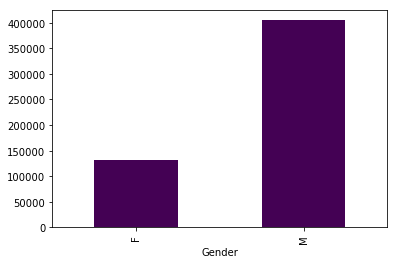

In [21]:
Gender_Count_trend = data.groupby(['Gender'])['Purchase'].count()
Gender_Count_trend.plot(kind = 'bar', colormap = 'viridis')

Hypothesis one - Given the count, men on average have spend more than women in this store.

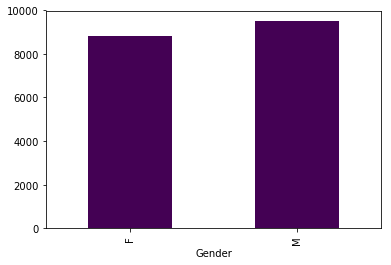

In [22]:
Gender_Purchase_trend = data.groupby(['Gender'])['Purchase'].mean()
Gender_Purchase_trend.plot(kind = 'bar', colormap = 'viridis')

Next, let's look at which age group has the highest amount of purchases in this store

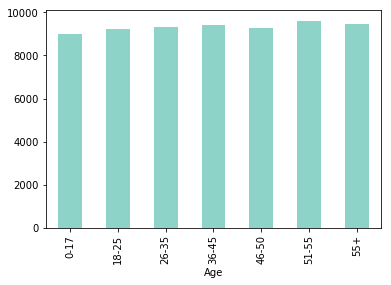

In [23]:
Age_trend = data.groupby(['Age'])['Purchase'].mean()
Age_trend.plot(kind = 'bar', colormap = 'Set3')

Hypothesis 2 - Given this trend, we would expect the highest number of transactions in this store to be from the 51-55 age group.

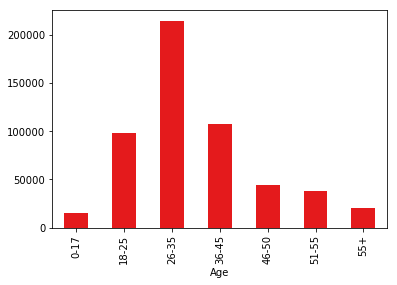

In [24]:
Age_trend2 = data.groupby(['Age'])['Purchase'].count()
Age_trend2.plot(kind = 'bar', colormap = 'Set1')

It's surprising to note that while Age group 51-55 spend the most, the most number of purchases are made by the 25-35 year olds in this store. 

It'll be interesting to put those two variables together (Age & Gender) and see many men vs. women shop in each age group at this store. 

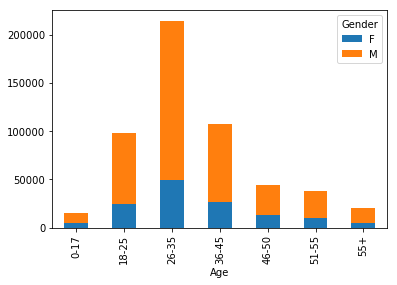

In [25]:
data.groupby(['Age','Gender'])['Purchase'].size().unstack().plot(kind='bar',stacked=True)


Both the analyses had predicted this data, we see more men in each age group with 26-35 being the highest number of customers in this store. 

Given that there are more men in the age group of 26 - 35 that shop at this store, we'd assume most of them are single. 

Hypothesis 2 - We assume there are more single people shopping at this store. 

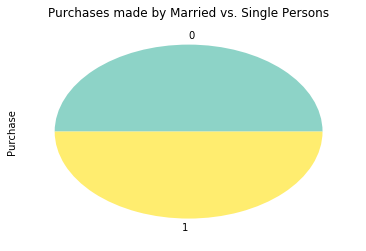

In [27]:
Marital_trend = data.groupby(['Marital_Status'])['Purchase'].mean()
Marital_trend.plot(kind = 'pie', title = "Purchases made by Married vs. Single Persons", colormap = 'Set3')

There are actually almost equal number of married vs. single persons shopping at this store. 

Given some of the other variables, we can also test if there is a corelation between them and the dependent variable, Purchase. 

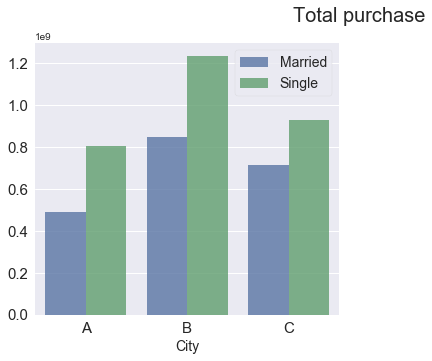

In [57]:
import numpy as np
import seaborn as sns

data['Marital_Status_label']=np.where(data['Marital_Status'] == 0,'Single','Married')
data_Tpurchase_by_City_Marital = data.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
data_Tpurchase_by_City_Stay = data.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=data_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)


Most customers hailed from City B and were single. 

In [29]:
data['Occupation'].corr(data['Purchase'])

0.021104340194127307

To test Resident Years and Gender for corelation, we have to conver them from objects to Integer format. I wrote two functions and applied them to the columns to convert their data type and find the correlation. 

In [31]:
def convert(column):
    column = int(column.strip('+'))
    return column 

#convert('5+')

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(convert)

In [32]:
pd.DataFrame(data.dtypes, columns = ['DataType'])

,DataType
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [33]:
data['Stay_In_Current_City_Years'].corr(data['Purchase'])

0.0054696252642119133

In [34]:
def Gender_convert(column):
    if column == 'F':
        return 1
    elif column == 'M':
        return 2
    else:
        return 0

In [35]:
data['Gender'] = data['Gender'].apply(Gender_convert)


In [36]:
pd.DataFrame(data.dtypes, columns = ['DataType'])

,DataType
User_ID,int64
Product_ID,object
Gender,int64
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [37]:
data['Gender'].corr(data['Purchase'])

0.060086165986946889

Among all the three variables, Gender/Resident Years/Occupation, Gender had the highest corelation to the dependent variable, Purchase. 

Next, we move to understanding the product categories at the store. 

In [38]:
#How many unique products did this store sell?
data['Product_ID'].nunique()

3623

In [39]:
data['Product_Category_1'].corr(data['Purchase'])

-0.3141247354708831

In [40]:
data['Product_Category_2'].corr(data['Purchase'])

0.038395070267498325

In [41]:
data['Product_Category_3'].corr(data['Purchase'])

0.28411988368376895

Given, the corelation factors, Product Category 3 would have contributed the highest towards Purchase and Product Category 2 would have contribute the least. 

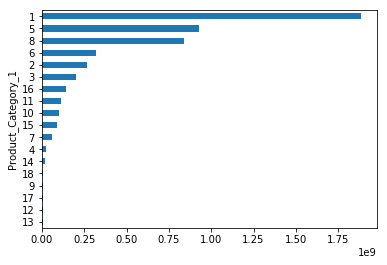

In [50]:
data.groupby(['Product_Category_1'])['Purchase'].sum().sort_values(ascending = True).plot(kind='barh')

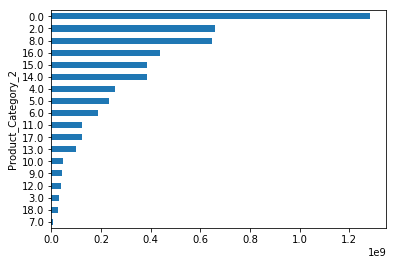

In [51]:
data.groupby(['Product_Category_2'])['Purchase'].sum().sort_values(ascending = True).plot(kind = 'barh')

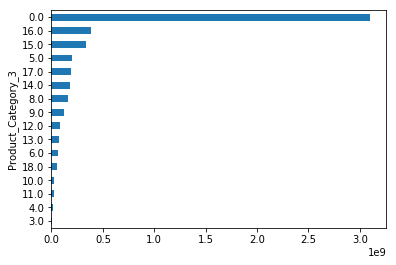

In [52]:
data.groupby(['Product_Category_3'])['Purchase'].sum().sort_values(ascending = True).plot(kind = 'barh')

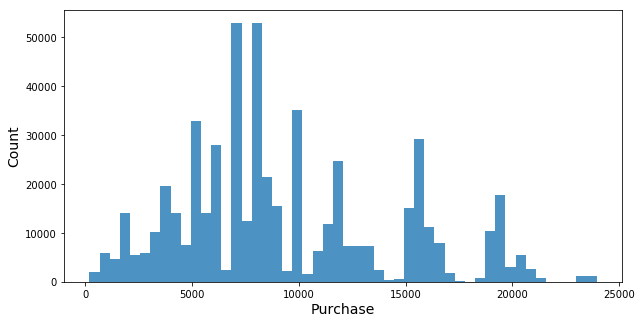

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(data['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

Most number of purchases also happened between the 5000 - 10,000 range

# Conclusion

In conclusion, we can now state that this retail store should advertise towards men especially in age groups of 26-35 and should focus on Product Category 3. We can advertise in City B, as a lot of shoppers hail from there and focus on the single young male group there. 